In [1]:
import numpy as np

adjacency_matrix = np.loadtxt('/workspace/data_proc/skypark/adjacency_matrix.txt')
print(f"Adjacency matrix shape: {adjacency_matrix.shape}")

print("First 5x5 section of the matrix:")
print(adjacency_matrix[:5, :5])

Adjacency matrix shape: (192, 192)
First 5x5 section of the matrix:
[[1. 1. 1. 1. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1.]]


In [2]:
!pip install networkx open3d

In [2]:
import networkx as nx

G = nx.from_numpy_array(adjacency_matrix)
print(f"Number of nodes: {G.number_of_nodes()}")

Number of nodes: 192


In [3]:
# load point cloud data (pcd file)
import open3d as o3d

pcd = o3d.io.read_point_cloud("/workspace/data_proc/skypark/nodes.pcd")
print("number of points: ", len(pcd.points))

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
number of points:  192


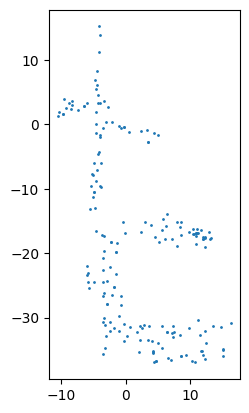

In [4]:
# plot the point cloud on x,y plane

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.asarray(pcd.points)[:, 1], -np.asarray(pcd.points)[:, 0], s=1)
# set aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.show()

In [5]:
# turn G into the biggest connected component
subgraph = max(nx.connected_components(G), key=len)
G = G.subgraph(subgraph)

In [6]:
len(list(nx.connected_components(G)))

1

1


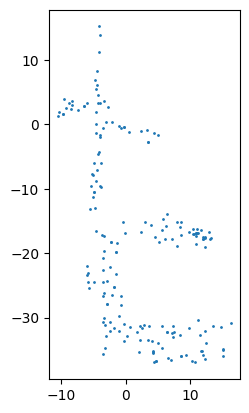

In [7]:

import matplotlib.pyplot as plt
# clear points where the corresponding point is not in the graph anymore
points = np.asarray(pcd.points)
points = points[list(list(nx.connected_components(G))[0])]
print(len(list(nx.connected_components(G))))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.asarray(points)[:, 1], -np.asarray(points)[:, 0], s=1)
# set aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.show()

In [ ]:
# save point to pcd file

In [8]:
a = nx.minimum_edge_cut(G)
print(a, len(a))

{(118, 119)} 1


In [16]:
#communities_generator = list(nx.community.girvan_newman(G))
# communities_generator = list(nx.community.asyn_fluidc(G, 8)) 
# communities_generator = nx.community.louvain_communities(G, seed=123)
# communities_generator = list(nx.community.asyn_lpa_communities(G))
# communities_generator = nx.community.greedy_modularity_communities(G)
communities_generator = nx.community.edge_betweenness_partition(G, 10)

In [17]:
len(communities_generator[5])

19

Number of communities: 10


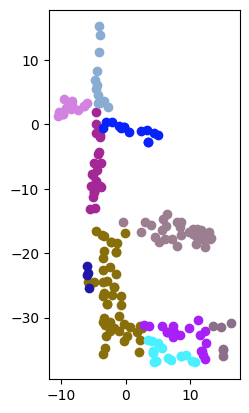

In [19]:
# visualize based on point cloud x,y coordinate
# use different color for each community
# adjecency matrix index = point cloud index

import matplotlib.pyplot as plt

def plot_communities(communities, pcd):
    print(f"Number of communities: {len(communities)}")
    colors = np.random.rand(len(communities), 3)
    for i, community in enumerate(communities):
        for node in community:
            x, y, _ = np.array(pcd.points)[node]
            plt.scatter(y, -x, color=colors[i])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

plot_communities(communities_generator, pcd)


/opt/conda/envs/cf_compact/lib/python3.10/site-packages/sklearn/cluster/_spectral.py:702: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


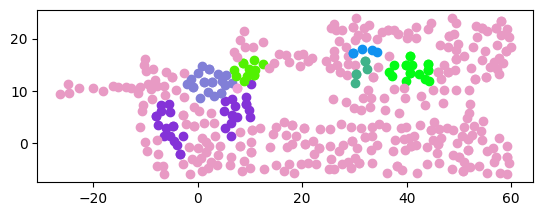

In [34]:
import numpy as np
import networkx as nx
from sklearn.cluster import SpectralClustering
from sklearn import metrics
np.random.seed(1)

# Cluster
sc = SpectralClustering(8)
sc.fit(adjacency_matrix)

def plot_clusters(labels, pcd):
    colors = np.random.rand(len(np.unique(labels)), 3)
    for i, label in enumerate(labels):
        x, y, _ = pcd.points[i]
        plt.scatter(y, -x, color=colors[label])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

plot_clusters(sc.labels_, pcd)

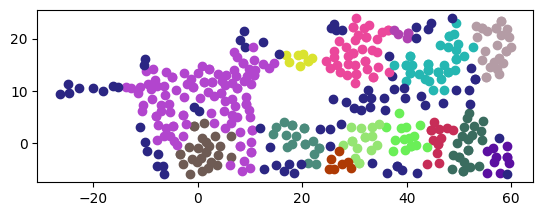

In [36]:
# run dbscan clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.0, min_samples=8)
dbscan.fit(np.asarray(pcd.points))

def plot_clusters(labels, pcd):
    colors = np.random.rand(len(np.unique(labels)), 3)
    for i, label in enumerate(labels):
        x, y, _ = pcd.points[i]
        plt.scatter(y, -x, color=colors[label])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

plot_clusters(dbscan.labels_, pcd)

In [ ]:
plot_communities(k_components[2], pcd)

In [37]:
!pip install markov_clustering[drawing]

  Using cached markov_clustering-0.0.6.dev0-py3-none-any.whl.metadata (947 bytes)
Using cached markov_clustering-0.0.6.dev0-py3-none-any.whl (6.3 kB)


In [59]:
import markov_clustering as mc

positions = {i: (point[0], point[1]) for i, point in enumerate(points)}
# Make sure your graph has edges
if G.number_of_edges() == 0:
    raise ValueError("Graph G has no edges.")


matrix = nx.to_scipy_sparse_array(G, weight="weight", format="lil")

result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters


mc.draw_graph(matrix, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")



<List of Lists sparse array of dtype 'float64'
	with 3937 stored elements and shape (407, 407)>
  Coords	Values
  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (0, 12)	1.0
  (0, 13)	1.0
  (0, 14)	1.0
  (0, 17)	1.0
  (1, 0)	1.0
  (1, 1)	1.0
  (1, 2)	1.0
  (1, 3)	1.0
  (1, 4)	1.0
  (1, 5)	1.0
  (1, 7)	1.0
  (1, 9)	1.0
  (1, 10)	1.0
  (1, 11)	1.0
  :	:
  (403, 399)	1.0
  (403, 400)	1.0
  (403, 401)	1.0
  (403, 403)	1.0
  (403, 404)	1.0
  (403, 406)	1.0
  (404, 392)	1.0
  (404, 399)	1.0
  (404, 400)	1.0
  (404, 401)	1.0
  (404, 403)	1.0
  (404, 404)	1.0
  (404, 405)	1.0
  (404, 406)	1.0
  (405, 396)	1.0
  (405, 399)	1.0
  (405, 400)	1.0
  (405, 401)	1.0
  (405, 404)	1.0
  (405, 405)	1.0
  (405, 406)	1.0
  (406, 403)	1.0
  (406, 404)	1.0
  (406, 405)	1.0
  (406, 406)	1.0


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional